In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

In [2]:
#Constantes
mu_0 = 4*np.pi*1e-7
n = 154 #vueltas: 130 para PASCO y 154 para el otro (PHYWE)
a = 0.2 #radio del solenoide: 0.15 para PASCO y 0.2 para el otro (PHYWE)

In [3]:
#Medidas con V cte en 150
#-------
i11 = 1.02 #de radio mas grande a mas chico
i12 = 1.28
i13 = 1.74
i14 = 2.76
# -- V cte en 200
i21 = 1.21
i22 = 1.53
i23 = 2.06
i24 = 3.20
# -- V cte en 250
i31 = 1.43
i32 = 1.76
i33 = 2.37
i34 = 3.68
# -- V cte en 300
i41 = 1.56
i42 = 1.94
i43 = 2.62
i44 = 4.03
#------- Medidas con I cte en 1.06
v11 = 158
v12 = 122
#v13 = 133 # Medida Descartable - rara ???? // DESCARTADA
v14 = 79
# -- I cte en 2.09
v21 = 00 #no llega a medir
v22 = 00
v23 = 200 #radio 3/100
v24 = 105 #radio 2/100
# -- I cte en 2.43
v31 = 000
v32 = 000 #no llega a medir
v33 = 272 #radio 3/100
v34 = 123 #radio 2/100
# -- I cte en 1.5
v41 = 282 #radio 5/100
v42 = 195
v43 = 131
v44 = 107
# -- I cte en 0.8 --- Descartamos al tener un I menor que 1A? (campo magnetico de la tierra NO despreciable) 
v51 = 112
v52 = 000 # Este radio lo salta
v53 = 104
v54 = 79




#-- Medidas con v cte en 150
corriente150 = [i11, i12, i13, i14]
voltaje150 = [150, 150, 150 ,150]
#-- Medidas con v cte en 200
corriente200 = [i21, i22, i23, i24]
voltaje200 = [200, 200, 200 ,200]
#-- Medidas con v cte en 250
corriente250 = [i31, i32, i33, i34]
voltaje250 = [250, 250, 250 ,250]
# -- Medidas con v cte en 300
corriente300 = [i41, i42, i43, i44]
voltaje300 = [300, 300, 300 ,300]
#----- ------- Medidas con I cte en 1.06
corriente1 = [1.06, 1.06, 1.06]
voltaje1 = [v11, v12, v14]
# -- Medidas con I cte en 2.09
corriente2 = [2.09, 2.09]
voltaje2 = [v23, v24] #los 2 radios mas chicos, 3cm y 2cm
# -- Medidas con I cte en 2.43
corriente3 = [2.43,2.43]
voltaje3 = [v33, v34]
# -- Medidas con I cte en 1.5
corriente4 = [1.5, 1.5, 1.5, 1.5]
voltaje4 = [v41, v42, v43, v44]
# -- Medidas con I cte en 0.8
corriente5 = [0.8, 0.8, 0.8]
voltaje5= [v51, v53, v54]

#------ RADIOS
radios = [5/100, 4/100, 3/100, 2/100]

In [4]:
#ERRORES DE MEDIDAS 
#Para I es 2% de la medida + 0.05A
#Para V es 0.8% de la medida + 2V
#Para R es 0.2/100 (falta medirlo y definirlo)
err_R = 0.2/100
err_R2 = [2.0e-04, 1.6e-04, 1.2e-04, 8.0e-05]

def calc_errI(I):
    error_I = np.multiply(0.02, I) + 0.05
    return error_I

#def calc_errV(V):
#    error_V = np.multiply(0.008, V) + 2
#    return error_V

#CALCULO ERROR DE 2V
def calc_err2V(V):
    error_V = np.multiply(0.008, V) + 2 #Calculo error de V
    error_2V = np.multiply(2, error_V) #Calculo error de 2V
    return error_2V

#CALCULO EROR R2
def calc_errR2(R):
    error_R = np.multiply(2,np.multiply(err_R, R))
    return error_R

#CALCULO ERROR DE B^2R^2
def calc_errB2R2(I, R, err_I, err_R):
    magnetic_sinI = np.divide((n*mu_0), np.power(5/4,3/2)*a)
    err_I = np.multiply(np.multiply(np.multiply(err_I,np.power(magnetic_sinI,2)),np.power(R,2)),np.multiply(2,I))
    
    err_R = np.multiply(np.multiply(np.multiply(err_R,np.power(magnetic_sinI,2)),np.power(I,2)),np.multiply(2,R))
    err_tot = np.sqrt(np.power(err_I,2) + np.power(err_R,2))
    
    return err_tot

#CALCULO ERROR DE 2V/B^2
def calc_err2V_B2(I, V, err_I, err_V):
    magnetic_sinI = np.divide((n*mu_0), np.power(5/4,3/2)*a)
    c_err_I = np.multiply(np.divide(np.multiply(2,V),np.multiply(magnetic_sinI, np.power(I,3))),err_I)
    
    c_err_V = np.multiply(np.divide(np.multiply(2,np.divide(1,np.power(magnetic_sinI,2))),np.power(I,2)),err_V)
    err_tot = np.sqrt(np.power(c_err_I,2) + np.power(c_err_V,2))
    
    return err_tot

#prueba = calc_errB2R2(corriente1, [5/100,4/100,2/100], calc_errI(corriente1), calc_errR2([5/100,4/100,2/100]))
#print(prueba)
#test2 = calc_err2V_B2(corriente150, voltaje150, calc_errI(corriente150), np.divide(calc_err2V(voltaje150),2))
#print(test2)

In [5]:
def calc_e_m(voltaje, corriente, radios):
    magnetico = np.multiply(np.power(4/5,3/2), np.multiply(mu_0, np.multiply(n, np.divide(corriente, a))))
    #print("-------Valores de B obtenidos:-------")
    #print(magnetico)
    #print("-------Valores de e/m obtenidos:-------")
    e_m = np.divide(np.multiply(2, voltaje), np.multiply(np.power(magnetico,2), np.power(radios,2)))
    print(e_m)
    return e_m

In [6]:

print("---------Voltaje const en 150")
e_v150 = calc_e_m(voltaje150, corriente150, radios)
print("---------Voltaje const en 200")
e_v200 = calc_e_m(voltaje200, corriente200, radios)
print("---------Voltaje const en 250")
e_v250 = calc_e_m(voltaje250, corriente250, radios)
print("---------Voltaje const en 300")
e_v300 = calc_e_m(voltaje300, corriente300, radios)
print("#### CORRIENTE CONSTANTE")
print("---------Corriente const en 1.06")
e_c1 = calc_e_m(voltaje1, corriente1, [5/100,4/100,2/100])
print("---------Corriente const en 2.09")
e_c2 = calc_e_m(voltaje2, corriente2, [3/100,2/100])
print("---------Corriente const en 2.43")
e_c3 = calc_e_m(voltaje3, corriente3, [3/100,2/100])
print("---------Corriente const en 1.5")
e_c4 = calc_e_m(voltaje4, corriente4, radios)
print("---------Corriente const en 0.8")
e_c5 = calc_e_m(voltaje5, corriente5, [5/100,3/100,2/100])

---------Voltaje const en 150
[2.40607834e+11 2.38731756e+11 2.29672559e+11 2.05386531e+11]
---------Voltaje const en 200
[2.27970212e+11 2.22785031e+11 2.18480108e+11 2.03717766e+11]
---------Voltaje const en 250
[2.04026595e+11 2.10452237e+11 2.06328710e+11 1.92549873e+11]
---------Voltaje const en 300
[2.05726816e+11 2.07853178e+11 2.02597937e+11 1.92668194e+11]
#### CORRIENTE CONSTANTE
---------Corriente const en 1.06
[2.34673583e+11 2.83130707e+11 7.33354947e+11]
---------Corriente const en 2.09
[2.12252967e+11 2.50723818e+11]
---------Corriente const en 2.43
[2.13536787e+11 2.17265830e+11]
---------Corriente const en 1.5
[2.09163277e+11 2.25990908e+11 2.69901392e+11 4.96021070e+11]
---------Corriente const en 0.8
[2.92049789e+11 7.53303026e+11 1.28749628e+12]


In [7]:
magnetico1 = np.multiply(mu_0, np.multiply(n, np.divide(corriente1, np.multiply(a,np.power(5/4,3/2)))))
magnetico2 = np.multiply(np.power(4/5,3/2), np.multiply(mu_0, np.multiply(n, np.divide(corriente2, a))))
magnetico3 = np.multiply(np.power(4/5,3/2), np.multiply(mu_0, np.multiply(n, np.divide(corriente3, a))))
magnetico4 = np.multiply(np.power(4/5,3/2), np.multiply(mu_0, np.multiply(n, np.divide(corriente4, a))))
magnetico5 = np.multiply(np.power(4/5,3/2), np.multiply(mu_0, np.multiply(n, np.divide(corriente5, a))))
magnetico150 = np.multiply(np.power(4/5,3/2), np.multiply(mu_0, np.multiply(n, np.divide(corriente150, a))))
magnetico200 = np.multiply(np.power(4/5,3/2), np.multiply(mu_0, np.multiply(n, np.divide(corriente200, a))))
magnetico250 = np.multiply(np.power(4/5,3/2), np.multiply(mu_0, np.multiply(n, np.divide(corriente250, a))))
magnetico300 = np.multiply(np.power(4/5,3/2), np.multiply(mu_0, np.multiply(n, np.divide(corriente300, a))))

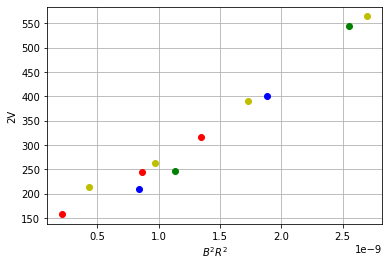

In [8]:
#Graficar magentico al cuadrado * radio al cuadrado vs 2*voltaje
#GRAFICOS PARA I CONSTANTE Y VOLTAJE: SE GRAFICA B^2 * R^2 vs 2V
plt.plot(np.multiply(np.power(magnetico1,2), np.power([5/100,4/100,2/100],2)), np.multiply(2, voltaje1), 'ro')
plt.plot(np.multiply(np.power(magnetico2,2), np.power([3/100,2/100],2)), np.multiply(2, voltaje2), 'bo')
plt.plot(np.multiply(np.power(magnetico3,2), np.power([3/100,2/100],2)), np.multiply(2, voltaje3), 'go')
plt.plot(np.multiply(np.power(magnetico4,2), np.power(radios,2)), np.multiply(2, voltaje4), 'yo')
plt.grid(True)
plt.xlabel('$B^2R^2$')
plt.ylabel('2V')
plt.show()


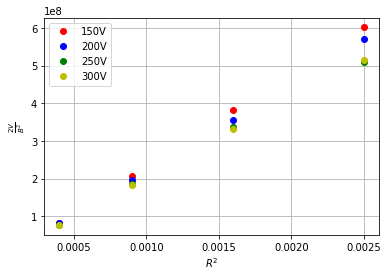

In [9]:
#Grafico para V constante. se grafica R^2 vs 2V/B^2
plt.plot(np.power(radios,2), np.divide(np.multiply(2, voltaje150), np.power(magnetico150,2)), 'ro', label='150V')
plt.plot(np.power(radios,2), np.divide(np.multiply(2, voltaje200), np.power(magnetico200,2)), 'bo', label='200V')
plt.plot(np.power(radios,2), np.divide(np.multiply(2, voltaje250), np.power(magnetico250,2)), 'go', label='250V')
plt.plot(np.power(radios,2), np.divide(np.multiply(2, voltaje300), np.power(magnetico300,2)), 'yo', label='300V')
plt.grid(True)
plt.xlabel('$R^2$')
plt.ylabel(r'$\frac{2V}{B^{2}}$')
plt.legend()
plt.show()

In [10]:
#Unir los puntos de los graficos anteriores en un solo array
magneticoI = np.concatenate((magnetico1, magnetico2, magnetico3, magnetico4), axis=None)
radiosI = np.concatenate(([5/100,4/100,2/100], [3/100,2/100], [3/100,2/100], radios), axis=None)
voltajeI = np.concatenate((voltaje1, voltaje2, voltaje3, voltaje4), axis=None)
B2R2 = np.multiply(np.power(magneticoI,2), np.power(radiosI,2))
dV = np.multiply(2, voltajeI)

In [11]:
#import statsmodels.api as sm
#model = sm.OLS(dV, B2R2)
#results = model.fit()
#print(results.summary())
#results.params

#make linear fit with ODR 
from scipy.odr import *
#def linear_func(p, x):
#    m, c = p
#    return m*x + c

#linear_model = Model(linear_func)
#data = RealData(B2R2, dV)
#odr = ODR(data, linear_model, beta0=[1.6e+11, 0])
#out = odr.run()
#out.pprint()

#Ajuste proporcional
def prop_func(p, x):
    m = p
    return m*x

prop_model = Model(prop_func)
data_propI = RealData(B2R2, dV, sx=np.multiply(2, np.multiply(0.01, B2R2)), sy=np.multiply(2, np.multiply(0.01, dV)))
odr_propI = ODR(data_propI, prop_model, beta0=[1.6e+11])
out_propI = odr_propI.run()
out_propI.pprint()



Beta: [2.60976015e+11]
Beta Std Error: [3.01295826e+10]
Beta Covariance: [[5.62069047e+18]]
Residual Variance: 161.5089372696142
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


In [12]:
#Ajustar sólo el primer grupo de datos con ajuste proporcional
B2R2_1 = np.multiply(np.power(magnetico1,2), np.power([5/100,4/100,2/100],2))
err_sx = calc_errB2R2(corriente1, [5/100,4/100,2/100], calc_errI(corriente1), calc_errR2([5/100,4/100,2/100]))
err_sy = calc_err2V(voltaje1)
#print(err_sx, err_sy)
#print(B2R2_1, np.multiply(2, voltaje1))
B2R2_2 = np.multiply(np.power(magnetico2,2), np.power([3/100,2/100],2))
err_sx2 = calc_errB2R2(corriente2, [3/100,2/100], calc_errI(corriente2), calc_errR2([3/100,2/100]))
err_sy2 = calc_err2V(voltaje2)
B2R2_3 = np.multiply(np.power(magnetico3,2), np.power([3/100,2/100],2))
err_sx3 = calc_errB2R2(corriente3, [3/100,2/100], calc_errI(corriente3), calc_errR2([3/100,2/100]))
err_sy3 = calc_err2V(voltaje3)
B2R2_4 = np.multiply(np.power(magnetico4,2), np.power(radios,2))
err_sx4 = calc_errB2R2(corriente4, radios, calc_errI(corriente4), calc_errR2(radios))
err_sy4 = calc_err2V(voltaje4)
B2R2_5 = np.multiply(np.power(magnetico5,2), np.power([5/100,3/100,2/100],2))
err_sx5 = calc_errB2R2(corriente5, [5/100,3/100,2/100], calc_errI(corriente5), calc_errR2([5/100,3/100,2/100]))
err_sy5 = calc_err2V(voltaje5)

In [13]:
#Ajustar b2r2_1 con ajuste lineal
def linear_func(p, x):
    m, c = p
    return m*x + c

linear_model = Model(linear_func)
data = RealData(B2R2_1, np.multiply(2, voltaje1), sx=err_sx, sy=err_sy)
odr = ODR(data, linear_model, beta0=[1.6e+11, 0])
odr.set_job(fit_type=0)
out = odr.run()
#out.pprint()

#Ajustar b232_4 con ajuste lineal
data4 = RealData(B2R2_4, np.multiply(2, voltaje4), sx=err_sx4, sy=err_sy4)
odr4 = ODR(data4, linear_model, beta0=[1.6e+11, 0])
odr4.set_job(fit_type=0)
out4 = odr4.run()
#out4.pprint()

#akistar b2r2_2 con ajuste lineal
data2 = RealData(B2R2_2, np.multiply(2, voltaje2), sx=err_sx2, sy=err_sy2)
odr2 = ODR(data2, linear_model, beta0=[1.6e+11, 0])
odr2.set_job(fit_type=0)
out2 = odr2.run()
#out2.pprint()

#ajustar b2r2_3 con ajuste lineal
data3 = RealData(B2R2_3, np.multiply(2, voltaje3), sx=err_sx3, sy=err_sy3)
odr3 = ODR(data3, linear_model, beta0=[1.6e+11, 0])
odr3.set_job(fit_type=0)
out3 = odr3.run()
out3.pprint()


Beta: [2.10553552e+11 7.60000000e+00]
Beta Std Error: [4.98811072e-04 7.36604646e-13]
Beta Covariance: [[ 1.19641739e+21 -1.64684260e+12]
 [-1.64684260e+12  2.60903230e+03]]
Residual Variance: 2.0796461789693474e-28
Inverse Condition #: 5.3480044217022355e-09
Reason(s) for Halting:
  Parameter convergence


In [14]:
data_propI1 = RealData(B2R2_1, np.multiply(2,voltaje1), sx=err_sx, sy=err_sy)
#make more accuarate fit
odr_propI1 = ODR(data_propI1, linear_model, beta0=[1.6e+11, 0])
out_propI1 = odr_propI1.run()
out_propI1.pprint()

Beta: [1.37115218e+11 1.28290941e+02]
Beta Std Error: [3.55915454e+09 1.70103847e+00]
Beta Covariance: [[ 3.52800222e+20 -1.25757184e+11]
 [-1.25757184e+11  8.05867111e+01]]
Residual Variance: 0.03590581938705114
Inverse Condition #: 3.1837166217429242e-09
Reason(s) for Halting:
  Sum of squares convergence


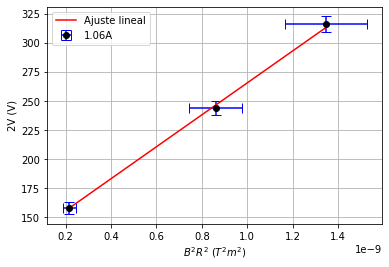

In [15]:

#Graficar datos anteriores con ajuste propricoinal y barras de errores
plt.errorbar(B2R2_1, np.multiply(2,voltaje1), xerr=calc_errB2R2(corriente1, [5/100,4/100,2/100], calc_errI(corriente1), calc_errR2([5/100,4/100,2/100])), yerr=calc_err2V(voltaje1), fmt='ko', ecolor='b', capsize=5, label='1.06A')
#plt.plot(B2R2_1, np.multiply(2,voltaje1), 'ro')
#plt.plot(B2R2_1, out_propI1.beta[0]*B2R2_1, 'r')
#plot linear fit
plt.plot(B2R2_1, out.beta[0]*B2R2_1 + out.beta[1], 'r', label='Ajuste lineal')
plt.grid(True)
plt.legend()
plt.xlabel('$B^2R^2$ $(T^2m^2)$')
plt.ylabel('2V (V)')
#print(plt.style.available)
plt.style.use('fast')
plt.show()

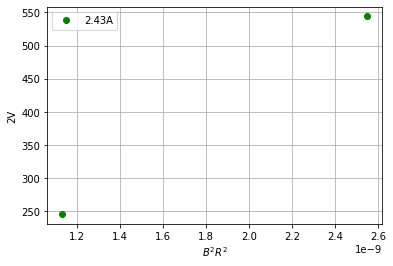

In [89]:
#plot all data con I constante sin ajuste y sin barras de error
#plt.plot(B2R2_5, np.multiply(2,voltaje5), 'mo', label='0.8A')
#plt.plot(B2R2_1, np.multiply(2,voltaje1), 'ro', label='1.06A')
#plt.plot(B2R2_4, np.multiply(2,voltaje4), 'yo', label='1.5A')
#plt.plot(B2R2_2, np.multiply(2,voltaje2), 'bo', label='2.09A')
plt.plot(B2R2_3, np.multiply(2,voltaje3), 'go', label='2.43A')
plt.grid(True)
plt.xlabel('$B^2R^2$')
plt.ylabel('2V')
plt.legend()
plt.show()

In [17]:
#Ajustar datos de b2r2_2 con ajuste proporcional
data_propI2 = RealData(B2R2_2, np.multiply(2,voltaje2), sx=err_sx2, sy=err_sy2)
#make more accuarate fit
odr_propI2 = ODR(data_propI2, prop_model, beta0=[1.6e+11])
out_propI2 = odr_propI2.run()
#out_propI2.pprint()

#Ahora para b2r2_3
data_propI3 = RealData(B2R2_3, np.multiply(2,voltaje3), sx=err_sx3, sy=err_sy3)
#make more accuarate fit
odr_propI3 = ODR(data_propI3, prop_model, beta0=[1.6e+11])
out_propI3 = odr_propI3.run()
#out_propI3.pprint()

#b2r2_4
data_propI4 = RealData(B2R2_4, np.multiply(2,voltaje4), sx=err_sx4, sy=err_sy4)
#make more accuarate fit
odr_propI4 = ODR(data_propI4, prop_model, beta0=[1.6e+11])
out_propI4 = odr_propI4.run()
#out_propI4.pprint()

#b2r2_5
data_propI5 = RealData(B2R2_5, np.multiply(2,voltaje5), sx=err_sx5, sy=err_sy5)
#make more accuarate fit
odr_propI5 = ODR(data_propI5, prop_model, beta0=[1.6e+11])
out_propI5 = odr_propI5.run()
#out_propI5.pprint()


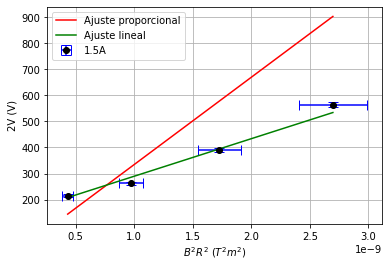

In [19]:
#Graficar datos de b2r2_4 con ajuste proporcional y barras de error
plt.errorbar(B2R2_4, np.multiply(2,voltaje4), xerr=calc_errB2R2(corriente4, radios, calc_errI(corriente4), calc_errR2(radios)), yerr=calc_err2V(voltaje4), fmt='ko', ecolor='b', capsize=5, label='1.5A')
#plot prop fit
plt.plot(B2R2_4, out_propI4.beta[0]*B2R2_4, 'r', label='Ajuste proporcional')
#plot linear fit
plt.plot(B2R2_4, out4.beta[0]*B2R2_4 + out4.beta[1], 'g', label='Ajuste lineal')
plt.grid(True)
plt.legend()
plt.xlabel('$B^2R^2$ ($T^{2}m^{2}$)')
plt.ylabel('2V (V)')
plt.show()


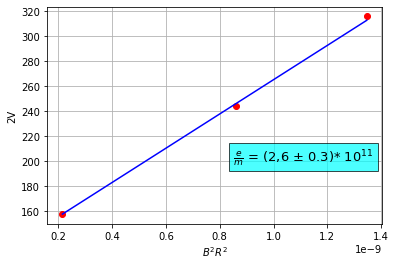

In [31]:
#Graficar el ajuste lineal nuevo
plt.plot(np.multiply(np.power(magnetico1,2), np.power([5/100,4/100,2/100],2)), np.multiply(2,voltaje1), 'ro')
#plot lineal fit
plt.plot(np.multiply(np.power(magnetico1,2), np.power([5/100,4/100,2/100],2)), linear_func(out.beta, np.multiply(np.power(magnetico1,2), np.power([5/100,4/100,2/100],2))), 'b-')
plt.grid(True)
#show plt legend with black box
#plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.02, 0.98))
plt.xlabel('$B^2R^2$')
plt.ylabel('2V')
#redice plot size
#plt.rcParams["figure.figsize"] = (10,10)
#plt.title("Ajuste lineal de $B^2R^2$ vs 2V")
#show fit data over plot with box 
plt.text(0.85e-9, 200, r'$\frac{e}{m}$ = (2,6 $\pm$ 0.3)* $10^{11}$' , fontsize=13,
         bbox=dict(facecolor='cyan', alpha=0.7), color='black')
#plt.text(1.75e-9,250, r'b = 0')

plt.show()


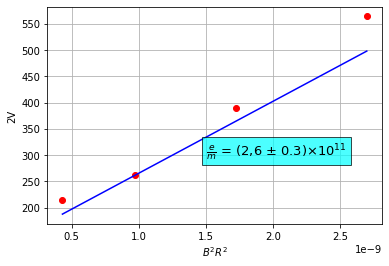

In [32]:
#plot the same graph but for magnetico2
plt.plot(np.multiply(np.power(magnetico4,2), np.power(radios,2)), np.multiply(2,voltaje4), 'ro')
#plot lineal fit
plt.plot(np.multiply(np.power(magnetico4,2), np.power(radios,2)), linear_func(out.beta, np.multiply(np.power(magnetico4,2), np.power(radios,2))), 'b-')
plt.grid(True)
plt.text(1.5e-9,300, r'$\frac{e}{m}$ = (2,6 $\pm$ 0.3)$\times10^{11}$' , fontsize=13,
        bbox=dict(facecolor='cyan', alpha=0.7), color='black')
#plt.text(1.75e-9,250, r'b = 0')
plt.xlabel('$B^2R^2$')
plt.ylabel('2V')
plt.show()

AHORA PARA V CONSTANTE

In [20]:
magneticoV = np.concatenate((magnetico150, magnetico200, magnetico250, magnetico300), axis=None)
radiosV = np.concatenate((radios, radios, radios, radios), axis=None)
voltajeV = np.concatenate((voltaje150, voltaje200, voltaje250, voltaje300), axis=None)
#Calcular R^2  
radios2 = np.power(radiosV,2)
#Calcular B^2
magnetico2 = np.power(magneticoV,2)
#Dividir 2V/B^2
y_voltaje = np.divide(np.multiply(2,voltajeV), magnetico2)


In [21]:
#Data para ajustar de una sola serie de datos de voltaje constante
R2 = np.power(radios,2)
V_B2 = np.divide(np.multiply(2,voltaje150), np.power(magnetico150,2))
V_B22= np.divide(np.multiply(2,voltaje200), np.power(magnetico200,2))
V_B23 = np.divide(np.multiply(2,voltaje250), np.power(magnetico250,2))
V_B24 = np.divide(np.multiply(2,voltaje300), np.power(magnetico300,2))

In [22]:
#Ajuste lineal con ODR
linear_model_voltaje = Model(linear_func)
data_voltaje = RealData(R2, V_B2, sx=calc_errR2(radios), sy=calc_err2V_B2(corriente150, voltaje150, calc_errI(corriente150), np.divide(calc_err2V(voltaje150),2)))
data_voltaje200 = RealData(R2, V_B22, sx=calc_errR2(radios), sy=calc_err2V_B2(corriente200, voltaje200, calc_errI(corriente200), np.divide(calc_err2V(voltaje200),2)))
data_voltaje250 = RealData(R2, V_B23, sx=calc_errR2(radios), sy=calc_err2V_B2(corriente250, voltaje250, calc_errI(corriente250), np.divide(calc_err2V(voltaje250),2)))
data_voltaje300 = RealData(R2, V_B24, sx=calc_errR2(radios), sy=calc_err2V_B2(corriente300, voltaje300, calc_errI(corriente300), np.divide(calc_err2V(voltaje300),2)))




odr_voltaje = ODR(data_voltaje300, linear_model_voltaje, beta0=[1.8e+11, 0])
odr_voltaje.set_job(fit_type=0)
out_voltaje = odr_voltaje.run()
out_voltaje.pprint()
print(" AJUSTE LINEAR ARRIBA, PROPORCIONAL ABAJO")

#Ajuste proporcional
def prop_func(p, x):
    m = p
    return m*x

prop_model = Model(prop_func)
#data_prop = RealData(radios2, y_voltaje, sx=err_R2)
odr_prop = ODR(data_voltaje300, prop_model, beta0=[1.6e+11])
out_prop = odr_prop.run()
out_prop.pprint()



Beta: [ 2.09618989e+11 -6.39126247e+06]
Beta Std Error: [1.80996711e+09 1.94128107e+06]
Beta Covariance: [[ 3.68930740e+20 -3.16273986e+17]
 [-3.16273986e+17  4.24404825e+14]]
Residual Variance: 0.008879663839345875
Inverse Condition #: 0.006431328180790352
Reason(s) for Halting:
  Sum of squares convergence
 AJUSTE LINEAR ARRIBA, PROPORCIONAL ABAJO
Beta: [2.04917067e+11]
Beta Std Error: [2.24417634e+09]
Beta Covariance: [[1.27535531e+20]]
Residual Variance: 0.03948960283290892
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


In [23]:
#Ajustar los datos para voltaje 200, 250 y 300 con ajuste proporcional
data_voltaje200= RealData(R2, V_B22, sx=calc_errR2(radios), sy=calc_err2V_B2(corriente200, voltaje200, calc_errI(corriente200), np.divide(calc_err2V(voltaje200),2)))
odr_prop200 = ODR(data_voltaje200, prop_model, beta0=[1.6e+11])
out_prop200 = odr_prop200.run()
#out_prop200.pprint()

data_voltaje250= RealData(R2, V_B23, sx=calc_errR2(radios), sy=calc_err2V_B2(corriente250, voltaje250, calc_errI(corriente250), np.divide(calc_err2V(voltaje250),2)))
odr_prop250 = ODR(data_voltaje250, prop_model, beta0=[1.6e+11])
out_prop250 = odr_prop250.run()
#out_prop250.pprint()

data_voltaje300 = RealData(R2, V_B24, sx=calc_errR2(radios), sy=calc_err2V_B2(corriente300, voltaje300, calc_errI(corriente300), np.divide(calc_err2V(voltaje300),2)))
odr_prop300 = ODR(data_voltaje300, prop_model, beta0=[1.6e+11])
out_prop300 = odr_prop300.run()
out_prop300.pprint()


Beta: [2.04917067e+11]
Beta Std Error: [2.24417634e+09]
Beta Covariance: [[1.27535531e+20]]
Residual Variance: 0.03948960283290892
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


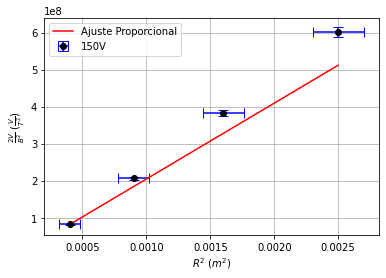

In [24]:
#Graficar solo los datos de la serie magnetico150
plt.errorbar(R2, V_B2, xerr=calc_errR2(radios), yerr=calc_err2V_B2(corriente150, voltaje150, calc_errI(corriente150), np.divide(calc_err2V(voltaje150),2)), fmt='ko', ecolor='b', capsize=5, label='150V')
#plot prop fit
#plt.plot(R2, out_voltaje.beta[0]*R2 + out_voltaje.beta[1], 'r-', label='Ajuste Lineal')
#plot prop fit
plt.plot(R2, out_prop.beta[0]*R2, 'r-', label='Ajuste Proporcional')
plt.grid(True)
#plt.text(0.00125, 2e+8, r'$\frac{e}{m}$ = (2.2 $\pm$ 0.1)$\times10^{11}$' , fontsize=13,
  #      bbox=dict(facecolor='cyan', alpha=0.7), color='black')
plt.xlabel('$R^2$ $(m^2)$')
plt.ylabel(r'$\frac{2V}{B^2}$ ($\frac{V}{T^{2}}$)')
plt.legend()
plt.show()


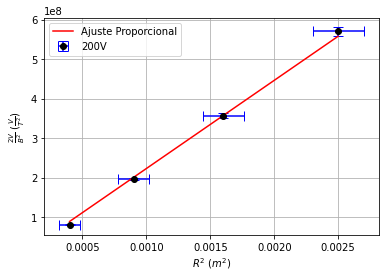

In [25]:
#Graficar los datos de la serie magnetico200
plt.errorbar(R2, V_B22, xerr=calc_errR2(radios), yerr=calc_err2V_B2(corriente200, voltaje200, calc_errI(corriente200), np.divide(calc_err2V(voltaje200),2)), fmt='ko', ecolor='b', capsize=5, label='200V')
#plot prop fit
#plt.plot(R2, out_voltaje.beta[0]*R2 + out_voltaje.beta[1], 'r-', label='Ajuste Lineal')
#plot prop fit
plt.plot(R2, out_prop200.beta[0]*R2, 'r-', label='Ajuste Proporcional')
plt.grid(True)
#plt.text(0.00125, 2e+8, r'$\frac{e}{m}$ = (2.2 $\pm$ 0.1)$\times10^{11}$' , fontsize=13,
    
plt.xlabel('$R^2$ $(m^2)$')
plt.ylabel(r'$\frac{2V}{B^2}$ ($\frac{V}{T^{2}}$)')
plt.legend()
plt.show()


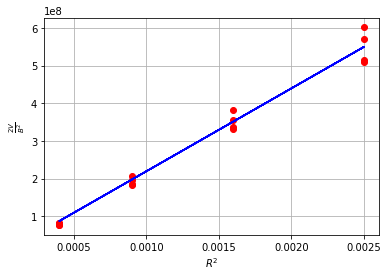

In [ ]:
#Graficar el ajuste lineal nuevo - Se ve super feo 
plt.plot(radios2, y_voltaje, 'ro')
#plot proporcional fit
plt.plot(radios2, prop_func(out_prop.beta, radios2), 'b-')
plt.grid(True)
#plt.text(1.5e-9,300, r'$\frac{e}{m}$ = (1,7 $\pm$ 0.1)$\times10^{11}$' , fontsize=13,
#        bbox=dict(facecolor='blue', alpha=0.7), color='black')
plt.xlabel('$R^2$')
plt.ylabel(r'$\frac{2V}{B^2}$')
plt.show()
